In [1]:
from Graph import Graph

In [2]:
# поиск остовного дерева графа
# Результатом является список рёбер графа, входящих в остовное дерево и суммарный вес дерева
# крускала

def undirected_adjacency_matrix(adjacency_matrix):
    # Получаем размерность матрицы
    n = len(adjacency_matrix)
    
    # Создаем нулевую матрицу с размером n x n для соотнесенного графа
    undirected_matrix = [[0] * n for _ in range(n)]
    
    # Заполняем соотнесенную матрицу на основе направленной
    for i in range(n):
        for j in range(i, n):
            undirected_matrix[i][j] = adjacency_matrix[i][j] or adjacency_matrix[j][i]
            undirected_matrix[j][i] = undirected_matrix[i][j]
    
    return undirected_matrix



def find(parent, node):
    if parent[node] == node:
        return node
    return find(parent, parent[node])

def union(parent, rank, u, v):
    root_u = find(parent, u)
    root_v = find(parent, v)

    if rank[root_u] < rank[root_v]:
        parent[root_u] = root_v
    elif rank[root_u] > rank[root_v]:
        parent[root_v] = root_u
    else:
        parent[root_v] = root_u
        rank[root_u] += 1

def kruskal(graph):
    num_vertices = len(graph)
    edges = []

    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] != 0:
                edges.append((i, j, graph[i][j]))

    edges.sort(key=lambda x: x[2])
    parent = list(range(num_vertices))
    rank = [0] * num_vertices
    mst = []
    mst_weight = 0

    for edge in edges:
        u, v, weight = edge
        if find(parent, u) != find(parent, v):
            mst.append((u, v, weight))  # Включаем вес ребра в остовное дерево
            mst_weight += weight
            union(parent, rank, u, v)

    return mst, mst_weight


In [4]:
# Прима


import heapq
import numpy as np

def matrix_to_adjacency_list(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        graph[i] = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                graph[i].append((j, matrix[i][j]))
    
    return graph

def prim(adj_matrix):
    matrix = np.array(adj_matrix)
    graph = matrix_to_adjacency_list(matrix)
    
    minimum_spanning_tree = []
    num_nodes = len(matrix)
    visited = set()
    
    # Выбираем начальную вершину (можно выбрать любую)
    start_node = 0
    visited.add(start_node)
    
    # Создаем приоритетную очередь для хранения ребер с их весами
    edge_heap = [(weight, start_node, neighbor) for neighbor, weight in graph[start_node]]
    heapq.heapify(edge_heap)
    
    while edge_heap:
        # Извлекаем ребро с минимальным весом
        weight, node1, node2 = heapq.heappop(edge_heap)
        
        # Если вершина node2 еще не посещена, добавляем ребро в остовное дерево
        if node2 not in visited:
            visited.add(node2)
            minimum_spanning_tree.append((node1, node2, weight))
            
            # Добавляем соседние ребра вершины node2 в приоритетную очередь
            for neighbor, edge_weight in graph[node2]:
                if neighbor not in visited:
                    heapq.heappush(edge_heap, (edge_weight, node2, neighbor))
    
    total_weight = sum(weight for _, _, weight in minimum_spanning_tree)
    
    return minimum_spanning_tree, total_weight


<h1>
    From 12 matrix
<h1>

Остовное дерево: [(1, 9, 5), (6, 20, 5), (10, 11, 5), (13, 16, 5), (1, 23, 6), (3, 24, 6), (7, 18, 6), (12, 17, 6), (15, 16, 6), (6, 9, 7), (8, 12, 7), (8, 15, 7), (8, 19, 7), (11, 13, 7), (12, 24, 7), (23, 24, 7), (3, 22, 8), (4, 23, 8), (7, 8, 8), (19, 21, 8), (0, 23, 9), (14, 16, 9), (3, 5, 10), (2, 14, 18)]
Суммарный вес дерева: 177


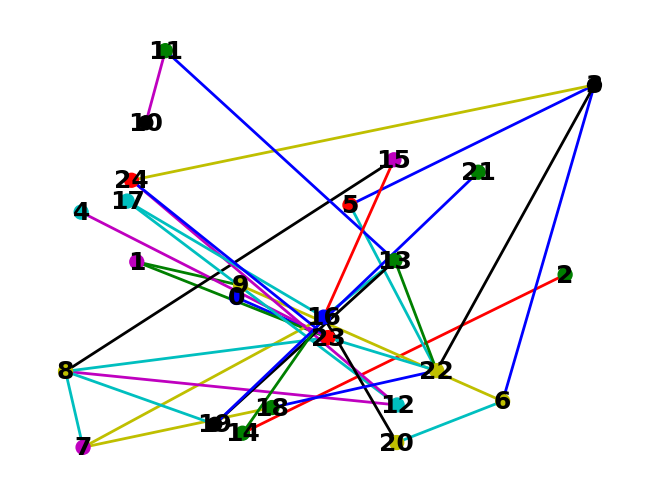

In [5]:
# from Graph import *

matrix_file = "task4/matrix_t4_003.txt"

g = Graph(matrix_file, "-m")


if not g.is_directed():
    mst_edges, mst_weight = kruskal(g.get_adjacency_matrix())
    print("Остовное дерево:", mst_edges)
    print("Суммарный вес дерева:", mst_weight)
elif g.is_directed():
    # print(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    mst_edges, mst_weight = kruskal(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    print("Остовное дерево:", mst_edges)
    print("Суммарный вес дерева:", mst_weight)
    

g.get_graph()


# print(g._Graph__adjacency_matrix)


Остовное дерево: [(0, 8, 22), (8, 3, 18), (3, 2, 12), (2, 6, 8), (3, 4, 12), (3, 10, 14), (6, 9, 16), (9, 11, 7), (9, 1, 15), (2, 5, 20), (4, 7, 23)]
Суммарный вес дерева: 167


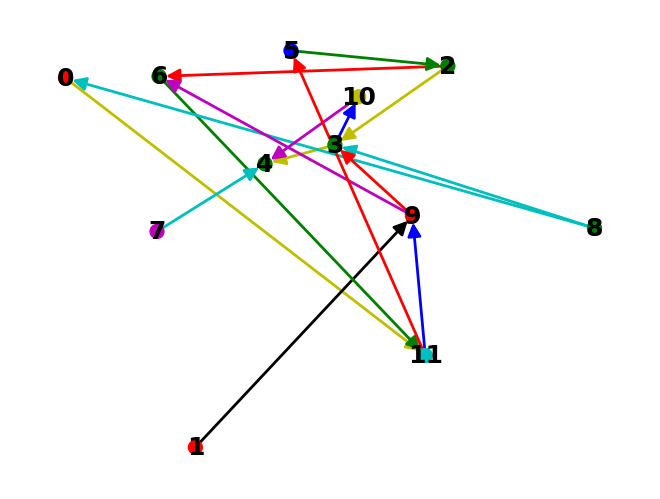

In [6]:
# from Graph import *

matrix_file = "task4/matrix_t4_002.txt"

g = Graph(matrix_file, "-m")

if not g.is_directed():
    minimum_spanning_tree, total_weight = prim(g.get_adjacency_matrix())
    print("Остовное дерево:", minimum_spanning_tree)
    print("Суммарный вес дерева:", total_weight)
elif g.is_directed():
    minimum_spanning_tree, total_weight = prim(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    print("Остовное дерево:", minimum_spanning_tree)
    print("Суммарный вес дерева:", total_weight)
    

g.get_graph()


In [60]:
# Борувки

def boruvka(graph):
    def find_min_edge(components, edges):
        min_edge = None
        min_weight = float('inf')
        for edge in edges:
            u, v, weight = edge
            u_component = None
            v_component = None
            for i, component in enumerate(components):
                if u in component:
                    u_component = i
                if v in component:
                    v_component = i
            if u_component is not None and v_component is not None and u_component != v_component and weight < min_weight:
                min_edge = edge
                min_weight = weight
        return min_edge

    def is_all_in_same_component(components, vertices):
        component_indices = set()
        for vertex in vertices:
            for i, component in enumerate(components):
                if vertex in component:
                    component_indices.add(i)
        return len(component_indices) == 1

    edges = []
    for i in range(len(graph)):
        for j in range(i + 1, len(graph[i])):
            if graph[i][j] > 0:
                edges.append((i, j, graph[i][j]))

    mst_edges = []
    total_weight = 0
    components = [{i} for i in range(len(graph))]

    while len(components) > 1:
        cheapest_edge = find_min_edge(components, edges)
        if cheapest_edge is None:
            break
        u, v, weight = cheapest_edge
        if is_all_in_same_component(components, [u, v]):
            continue
        total_weight += weight
        mst_edges.append((u, v, weight))

        new_component = {u, v}
        components = [comp for comp in components if u not in comp and v not in comp]
        components.append(new_component)
    print(11)
    return mst_edges, total_weight

matrix_file = "task4/matrix_t4_003.txt"

g = Graph(matrix_file, "-m")


if not g.is_directed():
    mmst_edges, total_weight = boruvka(g.get_adjacency_matrix())
    print("Список рёбер остовного дерева и их вес:")
    for edge in mst_edges:
        print(f"Ребро: ({edge[0]}, {edge[1]}), Вес: {edge[2]}")
    print("Суммарный вес остовного дерева:", total_weight)
elif g.is_directed():
    mmst_edges, total_weight = boruvka(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    print("Список рёбер остовного дерева и их вес:")
    for edge in mst_edges:
        print(f"Ребро: ({edge[0]}, {edge[1]}), Вес: {edge[2]}")
    print("Суммарный вес остовного дерева:", total_weight)
    


adjacency_matrix = g.get_adjacency_matrix()
print(g.is_directed())



11
Список рёбер остовного дерева и их вес:
Ребро: (2, 6), Вес: 8
Ребро: (2, 3), Вес: 12
Ребро: (3, 4), Вес: 12
Ребро: (3, 10), Вес: 14
Ребро: (1, 9), Вес: 15
Ребро: (0, 11), Вес: 24
Суммарный вес остовного дерева: 140
False


Список рёбер остовного дерева и их вес:
Ребро: (2, 6), Вес: 8
Ребро: (2, 3), Вес: 12
Ребро: (3, 4), Вес: 12
Ребро: (3, 10), Вес: 14
Ребро: (1, 9), Вес: 15
Ребро: (0, 11), Вес: 24
Суммарный вес остовного дерева: 110
False


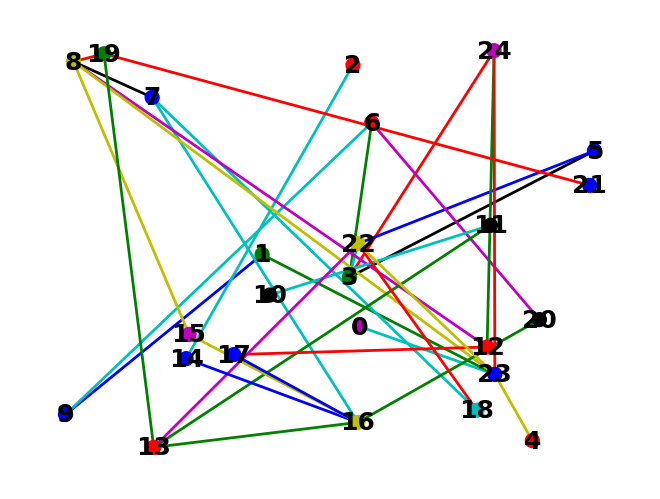

In [52]:
def boruvka(graph):
    def find_min_edge(components, edges):
        min_edge = None
        min_weight = float('inf')
        for edge in edges:
            u, v, weight = edge
            u_component = None
            v_component = None
            for i, component in enumerate(components):
                if u in component:
                    u_component = i
                if v in component:
                    v_component = i
            if u_component is not None and v_component is not None and u_component != v_component and weight < min_weight:
                min_edge = edge
                min_weight = weight
        return min_edge

    def is_all_in_same_component(components, vertices):
        component_indices = set()
        for vertex in vertices:
            for i, component in enumerate(components):
                if vertex in component:
                    component_indices.add(i)
        return len(component_indices) == 1

    edges = []
    for i in range(len(graph)):
        for j in range(i + 1, len(graph[i])):
            if graph[i][j] > 0:
                edges.append((i, j, graph[i][j]))

    mst_edges = []
    total_weight = 0
    components = [{i} for i in range(len(graph))]

    while len(components) > 1:
        cheapest_edge = find_min_edge(components, edges)
        if cheapest_edge is None:
            break
        u, v, weight = cheapest_edge
        if is_all_in_same_component(components, [u, v]):
            continue
        total_weight += weight
        mst_edges.append((u, v, weight))

        old_component = components[u]
        new_component = components[v]
        for i in range(len(components)):
            if components[i] == old_component:
                components[i] = new_component

    return mst_edges, total_weight




matrix_file = "task4/matrix_t4_003.txt"

g = Graph(matrix_file, "-m")

g.get_graph()

mmst_edges, total_weight = boruvka(g.get_adjacency_matrix())
print("Список рёбер остовного дерева и их вес:")
for edge in mst_edges:
    print(f"Ребро: ({edge[0]}, {edge[1]}), Вес: {edge[2]}")
print("Суммарный вес остовного дерева:", total_weight)
print(g.is_directed())

In [63]:
import numpy as np

def boruvka_mst(graph):
    num_vertices = len(graph)
    min_spanning_tree = []

    while len(min_spanning_tree) < num_vertices - 1:
        components = find_components(graph)
        light_edges = find_light_edges(graph, components)

        for component, edge in light_edges:
            min_spanning_tree.append(edge)
            graph = merge_components(graph, component)

    return min_spanning_tree

def find_components(graph):
    num_vertices = len(graph)
    components = list(range(num_vertices))

    for i in range(num_vertices):
        for j in range(num_vertices):
            if graph[i][j] > 0:
                if components[i] != components[j]:
                    old_component = components[i]
                    new_component = components[j]
                    for k in range(num_vertices):
                        if components[k] == old_component:
                            components[k] = new_component

    return components

def find_light_edges(graph, components):
    num_vertices = len(graph)
    light_edges = [None] * num_vertices

    for i in range(num_vertices):
        light_edges[i] = (components[i], (float('inf'), -1))

    for i in range(num_vertices):
        for j in range(num_vertices):
            if graph[i][j] > 0:
                if components[i] != components[j] and graph[i][j] < light_edges[components[i]][1][0]:
                    light_edges[components[i]] = (components[j], (graph[i][j], i, j))

    return light_edges

def merge_components(graph, component):
    num_vertices = len(graph)
    new_size = num_vertices - 1
    
    # Создаем новую матрицу с уменьшенным размером
    new_graph = np.zeros((new_size, new_size), dtype=int)
    
    mapping = {}  # Создаем отображение старых индексов в новые
    
    new_index = 0
    for i in range(num_vertices):
        if i != component:
            mapping[i] = new_index
            new_index += 1

    for i in range(num_vertices):
        if i == component:
            continue
        for j in range(num_vertices):
            if j == component:
                continue
            new_i = mapping[i] - (i > component)
            new_j = mapping[j] - (j > component)
            new_graph[new_i][new_j] = graph[i][j]

    return new_graph.tolist()




graph = [[0, 2, 0, 6, 0],
         [2, 0, 3, 8, 5],
         [0, 3, 0, 0, 7],
         [6, 8, 0, 0, 9],
         [0, 5, 7, 9, 0]]

min_spanning_tree = boruvka_mst(graph)
print(min_spanning_tree)


IndexError: index 3 is out of bounds for axis 0 with size 3

<h1>
    From 13 list
<h1>

In [6]:
list_file = 'task4/list_of_adjacency_t4_005.txt'

g = Graph(list_file, '-l')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()
# g = Graph(matrix_file, "-m")
# g.get_graph()

FileNotFoundError: [Errno 2] No such file or directory: 'task4/list_of_adjacency_t4_005.txt'

<h1>
    From 1 edge
<h1>

In [ ]:
edge_file = 'task4/list_of_edges_t4_010.txt'
g = Graph(edge_file, '-e')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()